In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data = pd.read_csv('data.csv', encoding='latin1')
no2 = data["no2"].dropna().values

/tmp/ipython-input-2224986536.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data.csv', encoding='latin1')


In [14]:
roll = 102303139

a = 0.05 * (roll % 7)
b = 0.3 * ((roll % 5) + 1)

print("a =", a)
print("b =", b)

a = 0.05
b = 1.5


In [5]:
data.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [15]:
print(data.columns)

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')


In [16]:
z = no2 + a * np.sin(b * no2)
counts, edges = np.histogram(z, bins=50, density=True)
centers = (edges[:-1] + edges[1:]) / 2

In [17]:
def pdf(z, lam, mu, c):
    value = -lam * (z - mu) ** 2
    value = np.clip(value, -500, 500)
    return c * np.exp(value)

start = [0.01, np.mean(z), 1]
best, _ = curve_fit(pdf, centers, counts, p0=start)

In [18]:
#printing the parameter values
lam = best[0]
mu = best[1]
c = best[2]

print("Lambda =", lam)
print("Mu =", mu)
print("c =", c)

Lambda = 0.002078994560840035
Mu = 19.728827255260416
c = 0.026863958126463094


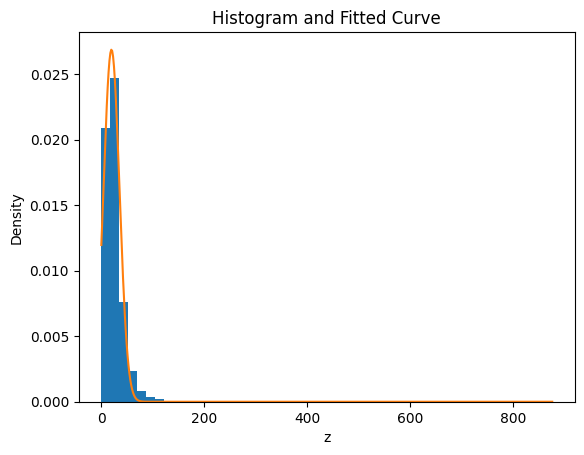

In [20]:
smooth = np.linspace(min(z), max(z), 500)
plt.hist(z, bins=50, density=True)
plt.plot(smooth, pdf(smooth, lam, mu, c))
plt.xlabel("z")
plt.ylabel("Density")
plt.title("Histogram and Fitted Curve")
plt.show()